In [19]:
# Resampling Technique: We'll use SMOTE to generate synthetic samples for the minority class (Fradulant Transactions) to balance the dataset.
# Classifier: We'll use Logistic Regression to train on the resampled dataset.
# Metrics: We will report accuracy, precision, recall, F1-score, and visualize the confusion matrix, similar to what was done in Part 2.

# Importing necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Step 1: Downloading and Loading the Dataset
# Dataset is stored locally as 'creditcard.csv'
df = pd.read_csv('creditcard.csv')

In [5]:
# Step 2: Separating features and target variable
X = df.drop(columns=['Class'])  # All features except the target 'Class'
y = df['Class']  # Target variable is the 'Class' column

In [7]:
# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 4: Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [34]:
# Step 5: Train a Classifier on the Resampled Dataset (Logistic Regression)
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_resampled, y_resampled)

C:\Users\mayur\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [35]:
# Step 6: Make predictions on the test set
y_pred = classifier.predict(X_test)

In [26]:
# Step 7: Report Performance Metrics
# Accuracy : Measures the proportion of correctly classified transactions.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9893


In [27]:
# Precision, Recall, F1-Score
# Precision: Measures how many predicted frauds are actual frauds.
# Recall: Measures how many of the actual frauds are identified.
# F1-Score: A balance between precision and recall.
# Confusion Matrix: Summarizes the performance of the model on fraud detection (true positives, true negatives, false positives, and false negatives).
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.1302
Recall: 0.9184
F1-Score: 0.2281


In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

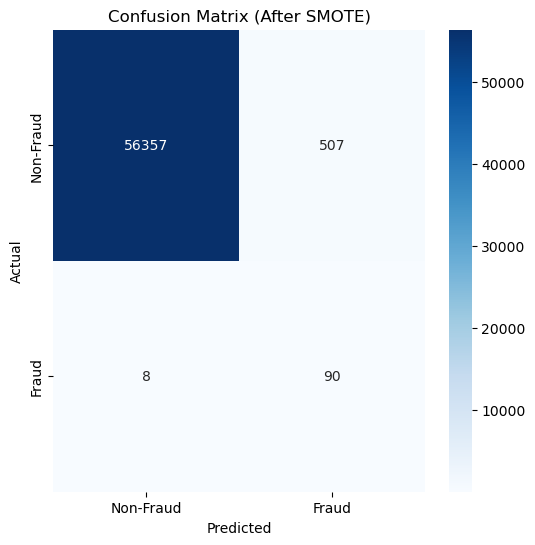

In [30]:
# Step 8: Display the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix (After SMOTE)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Conclusion 
# After applying SMOTE, you may observe:

# Higher recall: SMOTE helps in detecting more fraud cases by oversampling the minority class.
# Change in precision: Since the model is exposed to more fraud cases, precision may decrease slightly due to false positives.
# Improved F1-Score: As both precision and recall are balanced, the F1-score is expected to improve.